# 线性回归模型预测血糖数据

In [1]:
# 导入包
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## 读取数据

数据格式为mat文件，其中`PPP`标签为和血糖相关的系数，暂时不明了具体是哪些系数，而`TTT`则是表示着对应的血糖，提取的数据如下所示，数据量较小，仅有205组数据

In [2]:
file_name = "data.mat"
data = scio.loadmat(file_name)
X = data.get("PPP")
X = X.T
X = (X-X.mean(0))/X.std(0)
y = data.get("TTT")
y = y[0]

In [3]:
# 确认X和y数据第一维一致
print("X.shape :", X.shape, " y.shape: ", y.shape)

X.shape : (205, 4)  y.shape:  (205,)


In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
X[1:10,:]

array([[ 0.58313996, -1.32768467, -2.03085591, -1.18108895],
       [-0.56238481,  0.29455256,  0.16250569,  0.52500084],
       [-0.6851196 ,  0.07825426, -0.2189485 ,  0.99958835],
       [ 0.41949356, -0.31829262,  1.08435332,  0.20240034],
       [-0.8078544 , -0.13804403,  1.05256547, -1.2337239 ],
       [ 0.05128918,  1.15974574, -0.31431205,  2.61113739],
       [-1.54426318, -1.54398296, -0.31431205,  1.03802286],
       [-1.46243998,  0.54690057,  1.11614117,  0.82227804],
       [-0.27600362, -0.0659446 , -1.42688677, -0.73749783]])

In [7]:
y[1:10]

array([6.6, 9.1, 5.1, 5.3, 4.6, 6.3, 8.1, 4.7, 5.2])

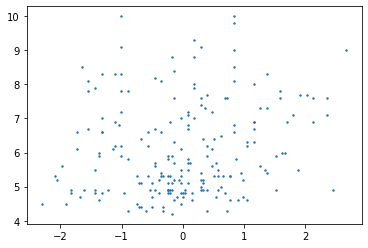

In [8]:
plt.scatter(X[:,1],y, s=2)
plt.show()

## 创建测试集

再确认数据格式无误后，可以将数据集分为训练数据集和测试数据集


In [9]:
# 根据比例划分数据集为训练集和测试集
def split_train_test(X, y, test_ratio):
    shuffled_indices = np.random.permutation(len(y))
    test_set_size = int(len(y) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices,:], y[train_indices], X[test_indices,:], y[test_indices]

In [10]:
# 分割得到训练集和测试集
train_X, train_y, test_X, test_y = split_train_test(X, y, 0.4)

In [11]:
train_X.shape, train_y.shape,test_X.shape, test_y.shape

((123, 4), (123,), (82, 4), (82,))

## 训练数据集

这里选择简单的线性回归模型，采用梯度下降的方法训练数据

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

LinearRegression()

以上就是简单的线性回归训练，从原始数据中，随机挑选几个数据检验模型的预测效果

In [13]:
some_data = X
some_labels = y
print('Predictions:', lin_reg.predict(some_data))

Predictions: [5.42779451 6.32162845 6.03767898 6.14878668 6.06017516 5.25149279
 7.03252987 5.55994194 5.56920587 6.14756084 6.63649279 5.60324435
 5.82904361 5.29034496 6.84098923 6.27749076 6.83436673 5.36533883
 5.25740834 6.51156973 6.08467095 5.74484976 6.14203751 5.76613131
 6.287307   6.20744982 5.34692912 6.52194592 5.7576547  5.36597283
 6.08913836 7.93847676 5.40006694 6.13923634 6.1815335  6.39100611
 6.99271304 6.35488924 6.28871558 5.95981579 5.70397027 6.26636945
 7.73030027 5.76923813 5.83639958 5.69428159 6.05521163 7.52287791
 5.92402263 5.82974519 7.0659224  5.57451558 5.71799787 5.48239141
 6.74810574 5.74375887 6.11630808 6.97028041 6.26018177 6.94710203
 5.67497141 6.37459078 6.23047672 5.77427038 5.3645231  6.22084405
 5.73938485 5.73348764 5.67440196 7.151381   5.78061506 5.323685
 6.59825572 6.44669482 5.59223054 5.85463837 6.98599284 7.31640824
 5.88369919 6.15257912 6.17250547 5.59312976 6.39786386 6.064114
 5.90855819 5.28770225 6.21645755 6.19718958 5.800732

In [14]:
print("Labels:",list(some_labels))

Labels: [4.6, 6.6, 9.1, 5.1, 5.3, 4.6, 6.3, 8.1, 4.7, 5.2, 7.8, 4.6, 5.9, 5.7, 7.8, 5.4, 6.2, 4.6, 4.9, 7.8, 5.6, 4.8, 5.5, 4.9, 5.1, 5.5, 4.9, 4.8, 5.6, 5.6, 7.0, 7.6, 5.3, 5.3, 6.4, 6.8, 7.2, 5.9, 7.1, 5.1, 5.7, 8.3, 7.6, 4.5, 6.1, 6.1, 6.1, 7.6, 6.6, 5.2, 8.0, 7.8, 4.4, 4.4, 9.1, 5.5, 7.0, 10.0, 8.3, 7.6, 7.2, 5.1, 5.8, 4.8, 5.1, 5.3, 5.6, 5.8, 4.9, 6.8, 5.5, 4.9, 5.0, 4.9, 4.3, 4.4, 7.7, 5.2, 5.9, 7.4, 6.2, 5.3, 5.4, 6.2, 7.6, 4.8, 8.4, 5.2, 6.0, 4.9, 6.4, 8.5, 5.5, 4.9, 4.3, 5.9, 6.3, 5.9, 8.8, 4.8, 4.9, 5.5, 5.3, 4.9, 6.4, 6.5, 5.0, 8.1, 6.6, 6.2, 4.5, 6.9, 8.3, 5.7, 4.7, 4.8, 5.4, 7.7, 4.6, 5.3, 4.5, 4.2, 4.8, 8.1, 4.3, 4.8, 6.9, 4.6, 7.6, 4.3, 4.9, 5.3, 4.9, 4.9, 7.1, 5.2, 6.0, 4.7, 5.3, 4.4, 9.8, 8.5, 6.9, 4.7, 5.1, 5.3, 6.6, 5.4, 6.8, 5.7, 5.1, 4.8, 7.9, 4.9, 6.2, 6.9, 7.9, 4.9, 6.3, 6.7, 4.9, 8.2, 7.0, 7.2, 6.7, 6.6, 9.3, 6.6, 6.1, 7.3, 4.8, 4.7, 5.3, 5.2, 7.1, 5.8, 7.6, 5.3, 8.3, 9.0, 4.7, 5.9, 10.0, 6.7, 4.9, 5.8, 6.7, 7.3, 5.2, 6.9, 4.5, 4.9, 6.0, 7.7, 5.3, 4.8, 8.0, 5.1,

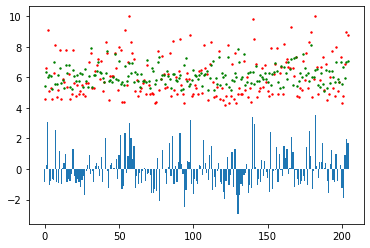

In [15]:
plt.scatter(range(len(some_labels)), some_labels, c='r', s=2)
plt.scatter(range(len(some_labels)), lin_reg.predict(some_data), c='g',s=2)
plt.bar(range(len(some_labels)), some_labels-lin_reg.predict(some_data), linewidth=1)
plt.show()

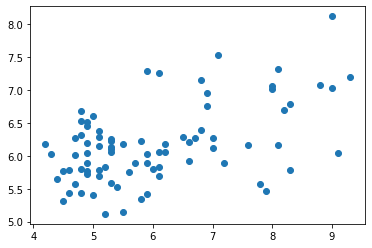

In [16]:
predict_y = lin_reg.predict(test_X)
plt.scatter(test_y,predict_y)
plt.show()

In [17]:
# clarke网格误差分析
def clarke(y,y_predicted):
    """
    clarke网格分析

    total, percentage = clarke(y, yp)
    
    INPUTS:
    y       Reference values(血糖浓度参考值)
    yp      Predicted/estimated values(血糖预测值)
    
    OUTPUTS:

    """
    # 设置坐标轴范围和坐标轴名称
    plt.xlim(0, 400*0.0556)
    plt.ylim(0, 400*0.0556)
    plt.xlabel('Reference values of Blood Glucose(mmol/L)')
    plt.ylabel('Predicted values of Blood Glucose(mmol/L)')
    # 获取数据长度
    n = len(y)
    # 散点图绘制数据
    plt.scatter(y, y_predicted, s=15)
    # 绘制网线
    # 上半区网线
    plt.plot([0,400*0.0556],[0,400*0.0556],linestyle=':',c='k') 
    plt.plot([0,175*0.0556/3],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([175*0.0556/3,400*0.0556/1.2],[70*0.0556,400*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,70*0.0556],[84*0.0556,400*0.0556],c='k', linewidth=1)
    plt.plot([0,70*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,290*0.0556],[180*0.0556,400*0.0556],c='k', linewidth=1)
    # 下半区网线绘制
    plt.plot([70*0.0556,70*0.0556],[0,56*0.0556],c='k',linewidth=1)
    plt.plot([70*0.0556,400*0.0556],[56*0.0556,320*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    plt.plot([180*0.0556,400*0.0556],[70*0.0556,70*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,240*0.0556],[70*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([240*0.0556,400*0.0556],[180*0.0556,180*0.0556],c='k',linewidth=1)
    plt.plot([130*0.0556,180*0.0556],[0,70*0.0556],c='k',linewidth=1)
    
    # 绘制区域标签A,B,C,D,E
    plt.text(30*0.0556,20*0.0556,'A',fontsize=9);
    plt.text(30*0.0556,150*0.0556,'D',fontsize=9);
    plt.text(30*0.0556,380*0.0556,'E',fontsize=9);
    plt.text(150*0.0556,380*0.0556,'C',fontsize=9);
    plt.text(160*0.0556,20*0.0556,'C',fontsize=9);
    plt.text(380*0.0556,20*0.0556,'E',fontsize=9);
    plt.text(380*0.0556,120*0.0556,'D',fontsize=9);
    plt.text(380*0.0556,260*0.0556,'B',fontsize=9);
    plt.text(280*0.0556,380*0.0556,'B',fontsize=9);

    # 计算数据
    total = np.zeros(5)
    # A区域
    for i in range(0,n):
        if (y[i] <= 70*0.0556 and y_predicted[i] <= 70*0.0556) or (y_predicted[i] <= 1.2*y[i] and y_predicted[i] >= 0.8*y[i]): 
            total[0] = total[0] + 1
        else:
            # E区域
            if(y[i] >= 180*0.0556 and y_predicted[i] <= 70*0.0556) or (y[i] <= 70*0.0556 and y_predicted[i] >= 180*0.0556):
                total[4] = total[4] + 1
            else:
                # 区域C
                if (y[i] >= 70*0.0556 and y[i] <= 290*0.0556) and (y_predicted[i] >= y[i] + 110*0.0556) or (y[i] >= 130*0.0556 and y[i] <= 180*0.0556) and (y_predicted[i] <= (7/5)*y[i] - 182*0.0556):
                    total[2] = total[2] + 1
                else:
                    # 区域D
                    if (y[i] >= 240*0.0556) and (y_predicted[i] >= 70*0.0556) and (y_predicted[i] <= 180*0.0556) or (y[i] <= 175*0.0556/3 and y_predicted[i] <= 180*0.0556) and (y_predicted[i] >= 70*0.0556) or (y[i] >= 175*0.0556/3 and y[i] <= 70*0.0556) and (y_predicted[i] >= (6/5)*y[i]):
                        total[3] = total[3] + 1
                    else:
                        # 区域B
                        total[1] = total[1] + 1

    percentage = (total/n)*100
    plt.show()
    return total, percentage

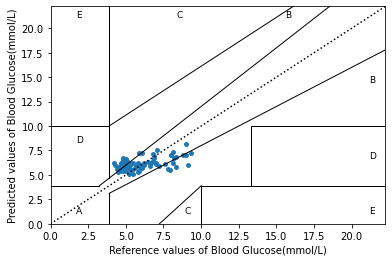

In [18]:
total, percentage = clarke(test_y, predict_y)

In [19]:
total

array([54., 28.,  0.,  0.,  0.])

数据点基本落入克拉克网络A,B区域，但是在B区域的点有点过多，准确率不是很高

In [20]:
percentage

array([65.85365854, 34.14634146,  0.        ,  0.        ,  0.        ])

## 偏最小二乘回归实现

In [21]:
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=2)
pls2.fit(train_X, train_y)
predict_y_pls2 = pls2.predict(test_X)

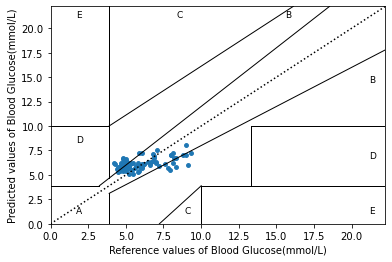

In [22]:
total_pls2, percentage_pls2 = clarke(test_y, predict_y_pls2)

In [23]:
total_pls2

array([54., 28.,  0.,  0.,  0.])

In [24]:
percentage_pls2

array([65.85365854, 34.14634146,  0.        ,  0.        ,  0.        ])

In [42]:
def get_rmse(yi, y):
    sum_val = ((yi-y)**2).sum()
    return np.sqrt(sum_val/len(y))

In [46]:
get_rmse(predict_y, test_y)

1.1626573090066017